<a href="https://colab.research.google.com/github/sapcode2028/Visualizing-COVID-19-Pandemic-Data/blob/main/notebook_1_covid19_TS/Visualizing_Time_Series_Dataset_COVID_19_Data_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

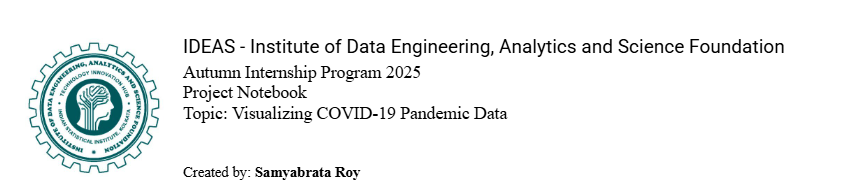

# Notebook: 1

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---



##📖 Introduction

When the COVID-19 pandemic began, the world was flooded with numbers — daily cases, recoveries, deaths, and later vaccinations. Looking at endless tables of figures wasn’t just boring, it was confusing.

But the moment those numbers were drawn into curves, bars, and maps, they started to make sense. Suddenly, we could see when cases were rising, where outbreaks were spreading, and how vaccinations were helping. The data wasn’t just numbers anymore — it was a story of how the world was coping.

That’s the real power of visualization. It’s not about making charts look pretty — it’s about making data human, so that anyone, not just experts, can understand what’s happening.

In this notebook, we’ll take COVID-19 data and learn step by step how to explore and visualize it using Python. Some of the code will be ready for you, while some parts will be left for you to try on your own. By the end, you’ll see how visualization can transform raw data into meaningful insights — and how those insights help us understand events that shape our lives.



---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily COVID-19 cases.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [3]:
# Replace with your Google Drive file ID which has public view access
file_id = "1r054TYsGmBbIob_rM_KCjjbORV58ayCr"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_covid = pd.read_csv(url)

  # Show first few rows
  print(df_covid.head())
except Exception as e:
    print(f"Error loading data: {e}")

  Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BD  Bangladesh       SEAR        0.0   
3    2020-01-04           BB    Barbados        AMR        NaN   
4    2020-01-04           BR      Brazil        AMR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         0.0                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  


## Subsetting the Dataset for Analysis

To simplify the study, I will take a subset of the dataset containing only the most relevant columns:

- **Date_reported**
- **Country**
- **WHO_region**
- **New_cases**
- **New_deaths**
- **Cumulative_cases**
- **Cumulative_deaths**

This subset will allow me to focus on the essential variables required for exploratory data analysis (EDA).  


In [4]:
# Subsetting the dataset for analysis
subset_cols = [
    "Date_reported",
    "Country",
    "WHO_region",
    "New_cases",
    "New_deaths",
    "Cumulative_cases",
    "Cumulative_deaths"
]

df_covid_subset = df_covid[subset_cols].copy()

### Date Trimming  

Since our dataset contains records over a wide range of dates, we may not always need the full timeline for analysis.  
To make the dataset more relevant and manageable, we will **filter the data based on a specific date range**.  

This allows us to:  
- Focus on a particular period of interest (e.g., second wave, third wave, or vaccination drive).  
- Reduce noise from irrelevant dates.  
- Improve the clarity of visualizations by narrowing down to meaningful time windows.  

By trimming the data to the required start and end dates, we ensure that our analysis stays **targeted and insightful**.  

#### Here start date is chosen as 1st of Mar 2020 & end date is choosen as 31st of Aug 2023 as according to WHO, they stopped requiring daily basis data reporting since August 2023

In [5]:
# Assuming your dataframe is named df and Date_reported is already in datetime format
df_covid_subset['Date_reported'] = pd.to_datetime(df_covid_subset['Date_reported'])

# Define the date range
start_date = "2020-03-01"
end_date = "2023-08-31"

# Filter the rows
df_covid_trimmed = df_covid_subset[(df_covid_subset['Date_reported'] >= start_date) & (df_covid_subset['Date_reported'] <= end_date)]

# Check subset
print("Subset shape:", df_covid_trimmed.shape)
print(df_covid_trimmed.head())
print(df_covid_trimmed.tail())

Subset shape: (306960, 7)
      Date_reported  Country WHO_region  New_cases  New_deaths  \
13680    2020-03-01    Yemen        EMR        NaN         NaN   
13681    2020-03-01  Uruguay        AMR        NaN         NaN   
13682    2020-03-01  Ukraine        EUR        NaN         NaN   
13683    2020-03-01  Tunisia        EMR        NaN         NaN   
13684    2020-03-01    Sudan        EMR        NaN         NaN   

       Cumulative_cases  Cumulative_deaths  
13680                 0                  0  
13681                 0                  0  
13682                 0                  0  
13683                 0                  0  
13684                 0                  0  
       Date_reported                           Country WHO_region  New_cases  \
320635    2023-08-31                        Tajikistan        EUR        NaN   
320636    2023-08-31                         Sri Lanka       SEAR        0.0   
320637    2023-08-31                   Solomon Islands        WPR  

## EDA including visualization

In the EDA, I will perform the following visualizations:

1. **Line plots for daily cases in the top 5 affected countries**  
   (Initially with Matplotlib to highlight limitations, then with Plotly for interactivity).

2. **Stacked bar chart for new cases vs new deaths by WHO region**  
   (To show region was more saceptable to COVID-19).  

3. **Heatmap of case intensity by date and region**  
   (To visualize hotspots and the spread over time).  




---


### Plot 1

This code identifies the top 5 countries with the highest cumulative COVID-19 cases, filters their data, and then plots line graphs of daily new cases over time for each of those countries using Matplotlib.

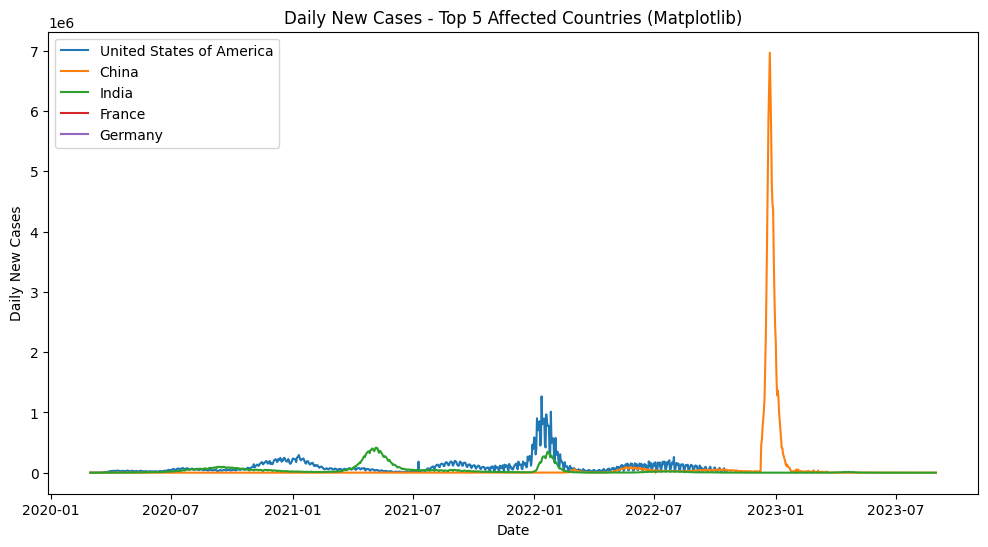

In [6]:
# 1. Line plots for daily cases in the top 5 affected countries

# Find top 5 affected countries by cumulative cases
top5_countries = (
    df_covid_trimmed.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data
df_top5 = df_covid_trimmed[df_covid_trimmed["Country"].isin(top5_countries)]

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in top5_countries:
    country_data = df_top5[df_top5["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - Top 5 Affected Countries (Matplotlib)")
plt.legend()
plt.show()


**Note:** On the y-axis, `1e6` means **1 million (1,000,000)** and `1e8` means **100 million (100,000,000)**.


---



## Question:
What we should have done instade to plot the top 5 countries least affected by COVID-19?

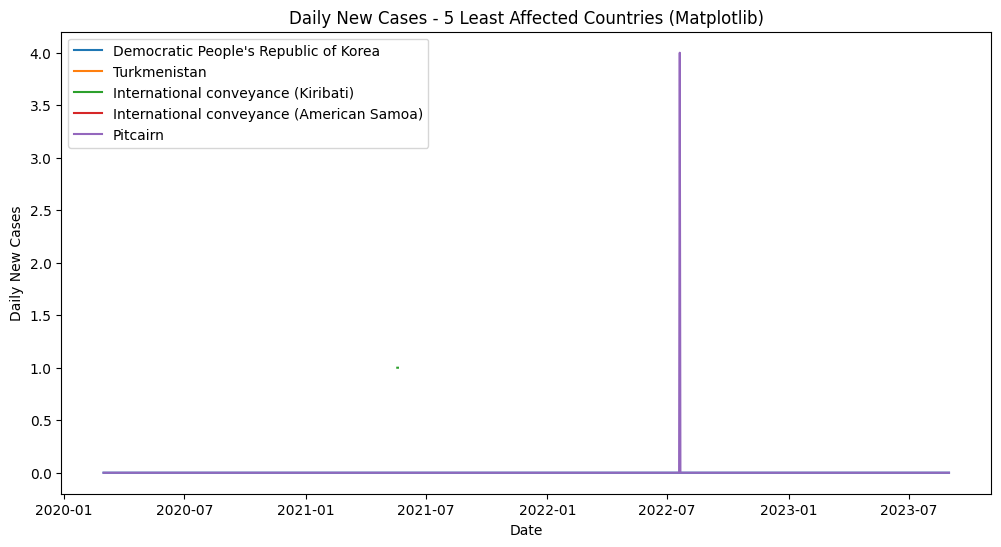

In [9]:
# Find bottom 5 affected countries by cumulative cases
bottom5_countries = (
    df_covid_trimmed.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=True)   # ascending instead of descending
    .head(5)
    .index
)

# Filter data
df_bottom5 = df_covid_trimmed[df_covid_trimmed["Country"].isin(bottom5_countries)]

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in bottom5_countries:
    country_data = df_bottom5[df_bottom5["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - 5 Least Affected Countries (Matplotlib)")
plt.legend()
plt.show()


### Task

Create a line plot which shows daily global new cases as one dramatic mountain shape

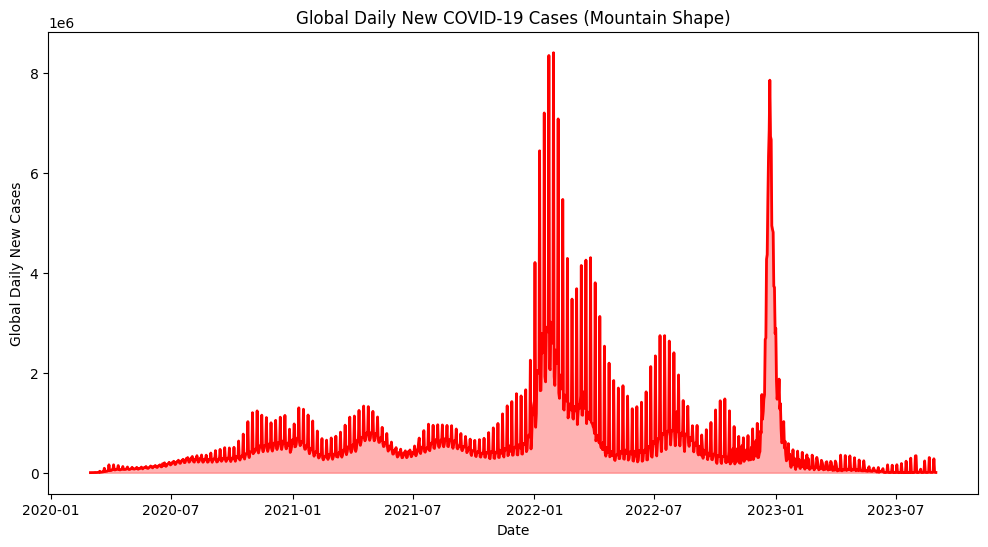

In [10]:
# Group by date and sum new cases globally
df_global = (
    df_covid_trimmed.groupby("Date_reported")["New_cases"]
    .sum()
    .reset_index()
)

# Plotting the global daily new cases
plt.figure(figsize=(12,6))
plt.plot(df_global["Date_reported"], df_global["New_cases"], color="red", linewidth=2)

plt.xlabel("Date")
plt.ylabel("Global Daily New Cases")
plt.title("Global Daily New COVID-19 Cases (Mountain Shape)")
plt.fill_between(df_global["Date_reported"], df_global["New_cases"], color="red", alpha=0.3)  # shaded area for mountain effect
plt.show()




---

### Plot 2

This code aggregates COVID-19 new cases and deaths by quarter and visualizes them using a stacked bar chart, where deaths are shown on top of cases. It highlights the timeline of the pandemic’s impact, making it easier to compare peaks and proportions across different periods.

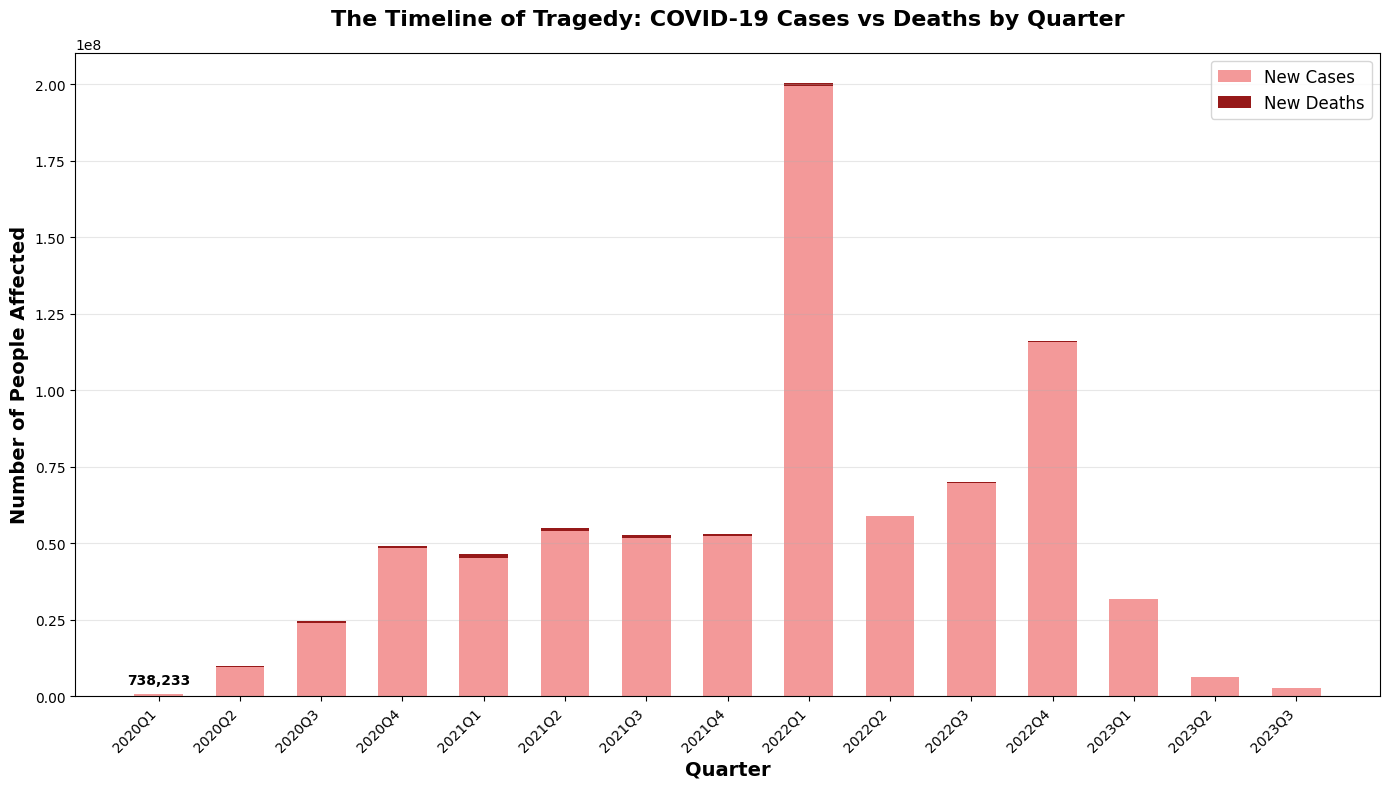

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
# Cases vs Deaths Over Time (Quarterly)

# Show the relationship between cases and deaths over time periods

# Create quarterly data for cleaner visualization
df_copy = df_covid_trimmed.copy()
df_copy['Quarter'] = df_copy['Date_reported'].dt.to_period('Q')

# Aggregate by quarter
quarterly_data = df_copy.groupby('Quarter').agg({'New_cases': 'sum', 'New_deaths': 'sum'}).reset_index()

# Convert period to string for plotting
quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars
width = 0.6
cases_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_cases'],
                       width, label='New Cases', color='lightcoral', alpha=0.8)
deaths_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_deaths'],
                        width, bottom=quarterly_data['New_cases'],
                        label='New Deaths', color='darkred', alpha=0.9)

# Customize the plot
ax.set_title('The Timeline of Tragedy: COVID-19 Cases vs Deaths by Quarter',
                fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add value annotations on the bars
for i, (cases, deaths) in enumerate(zip(quarterly_data['New_cases'], quarterly_data['New_deaths'])):
  # Annotate total at the top
  total = cases + deaths
  ax.annotate(f'{total:,.0f}',
                xy=(i, total),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                fontweight='bold', fontsize=10)

  plt.tight_layout()
  plt.show()

  # Print insights
  max_quarter = quarterly_data.loc[quarterly_data['New_cases'].idxmax(), 'Quarter_str']
  max_cases = quarterly_data['New_cases'].max()



**Note:** On the y-axis, `1e6` means **1 million (1,000,000)** and `1e8` means **100 million (100,000,000)**.


---



### Task

Convert the above chart to double bar chart with the same data

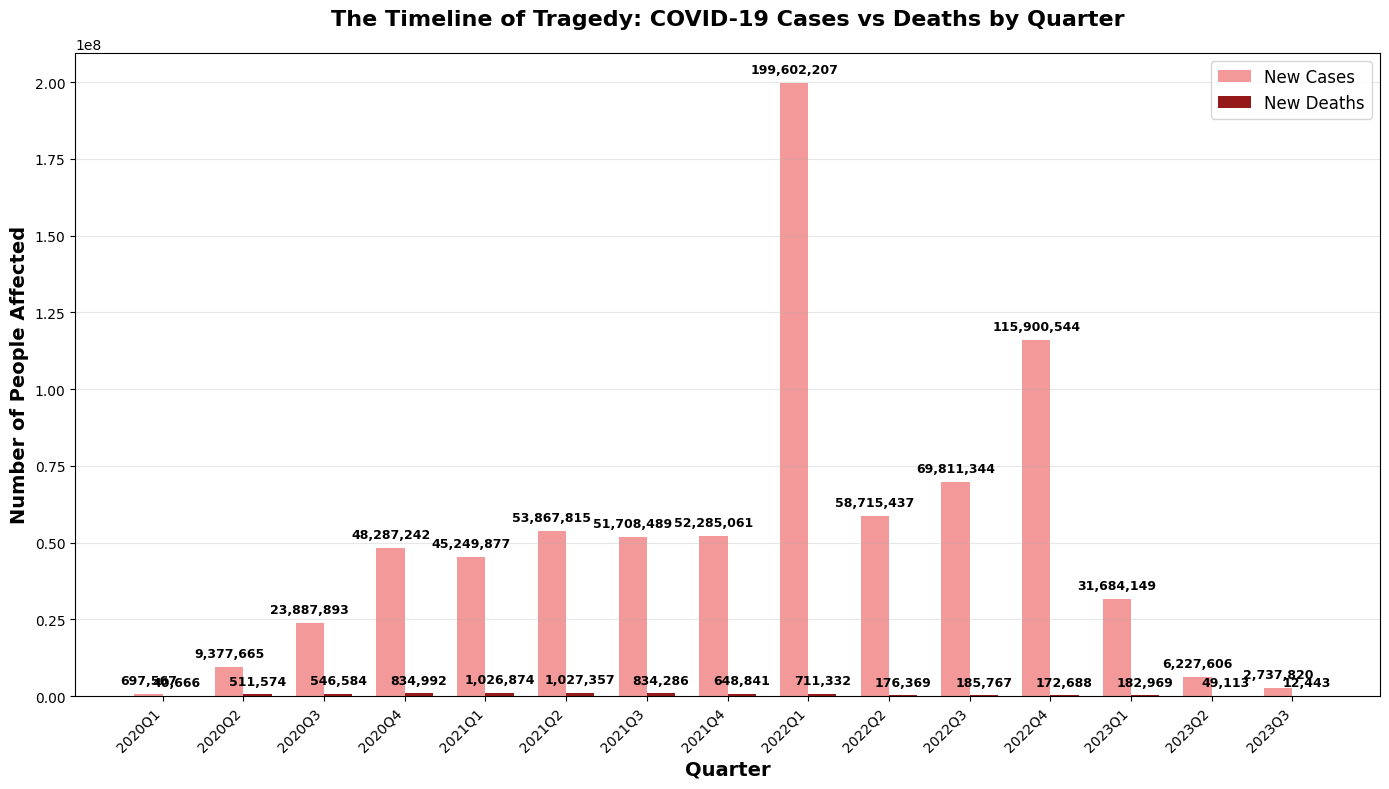

Quarter with highest cases: 2022Q1 (199,602,207 cases)


In [12]:
import numpy as np

# Prepare the x positions
x = np.arange(len(quarterly_data))  # positions for quarters
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(14, 8))

# Create side-by-side bars
cases_bars = ax.bar(x - width/2, quarterly_data['New_cases'], width,
                    label='New Cases', color='lightcoral', alpha=0.8)
deaths_bars = ax.bar(x + width/2, quarterly_data['New_deaths'], width,
                     label='New Deaths', color='darkred', alpha=0.9)

# Customize the plot
ax.set_title('The Timeline of Tragedy: COVID-19 Cases vs Deaths by Quarter',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(quarterly_data['Quarter_str'], rotation=45, ha='right')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Add value annotations on the bars
for bars in [cases_bars, deaths_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,.0f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print insights
max_quarter = quarterly_data.loc[quarterly_data['New_cases'].idxmax(), 'Quarter_str']
max_cases = quarterly_data['New_cases'].max()
print(f"Quarter with highest cases: {max_quarter} ({max_cases:,.0f} cases)")


### Task

Construct a pie chart which Shows just top 10 countries mostly affected by COVID-19 ( by cummulative deaths)

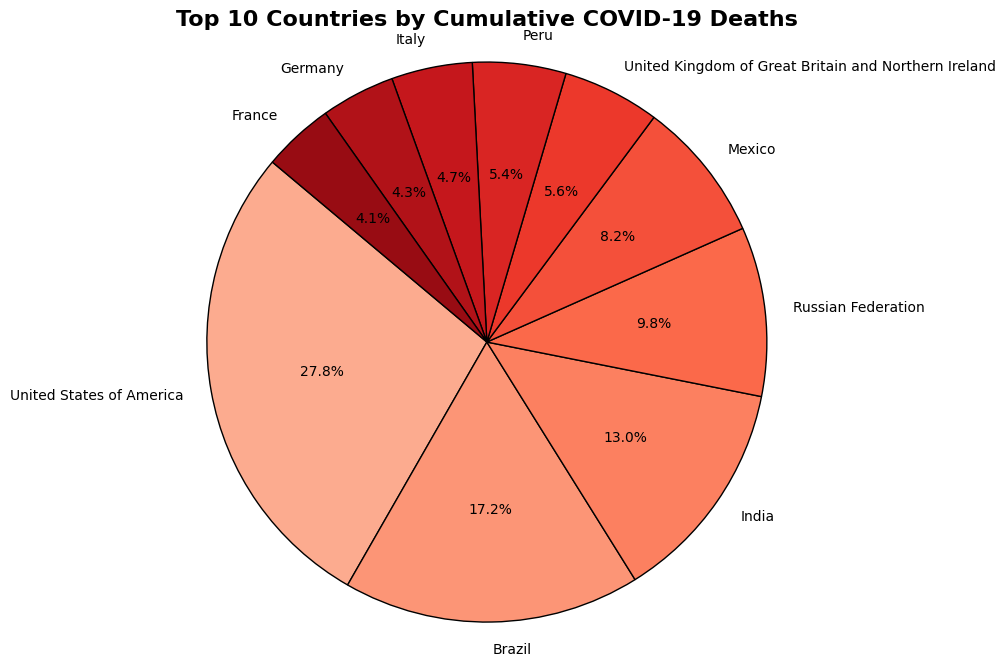

In [13]:
# Find top 10 countries by cumulative deaths
top10_deaths = (
    df_covid_trimmed.groupby("Country")["Cumulative_deaths"]
    .max()
    .sort_values(ascending=False)
    .head(10)
)

# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    top10_deaths,
    labels=top10_deaths.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Reds(np.linspace(0.3, 0.9, 10)),  # shades of red
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Top 10 Countries by Cumulative COVID-19 Deaths", fontsize=16, fontweight='bold')
plt.axis('equal')  # equal aspect ratio for perfect circle
plt.show()




---

### Plot 3

We aggregated monthly COVID-19 new cases by WHO region and visualized them using a heatmap.
This highlights when and where case surges were most intense across different regions.

/tmp/ipython-input-3601044939.py:34: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


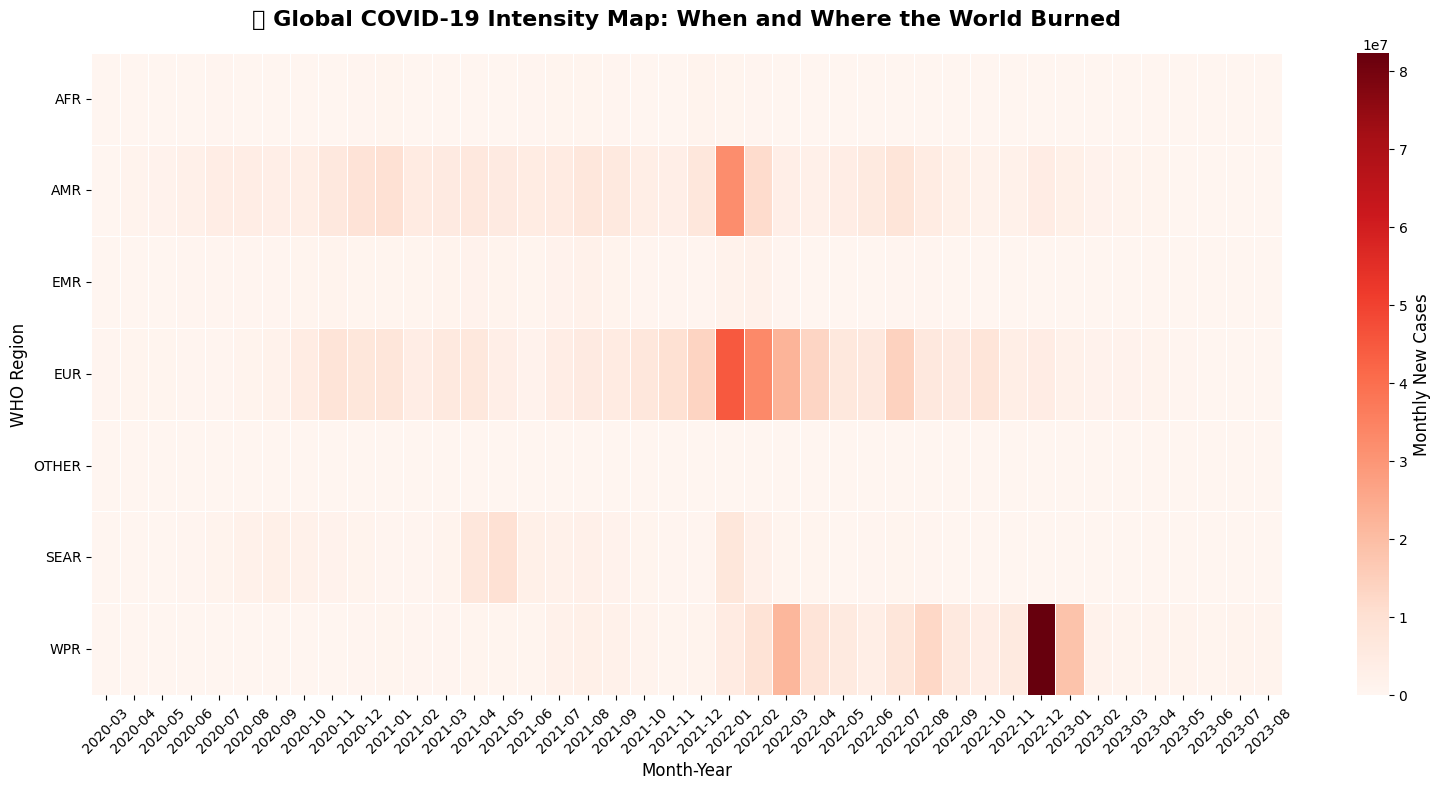

In [ ]:
#Create a powerful heatmap showing intensity across regions and time
# Create monthly data for cleaner visualization
df_monthly = df_covid_trimmed.copy()
df_monthly['Month_Year'] = df_monthly['Date_reported'].dt.to_period('M')

# Aggregate by WHO region and month
heatmap_data = df_monthly.groupby(['WHO_region', 'Month_Year'])['New_cases'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='WHO_region', columns='Month_Year', values='New_cases')

# Fill missing values with 0
heatmap_pivot = heatmap_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))

# Use a dramatic color scheme
sns.heatmap(heatmap_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Monthly New Cases'},
            linewidths=0.5,
            linecolor='white')

plt.title('Global COVID-19 Intensity Map: When and Where the World Burned',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('WHO Region', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

### Task:

1) Visualize another heatmap showing quaterly new deaths' intensity by regions.
2) Visualize a heatmap showing monthly new cases' intensity by top 10 countries

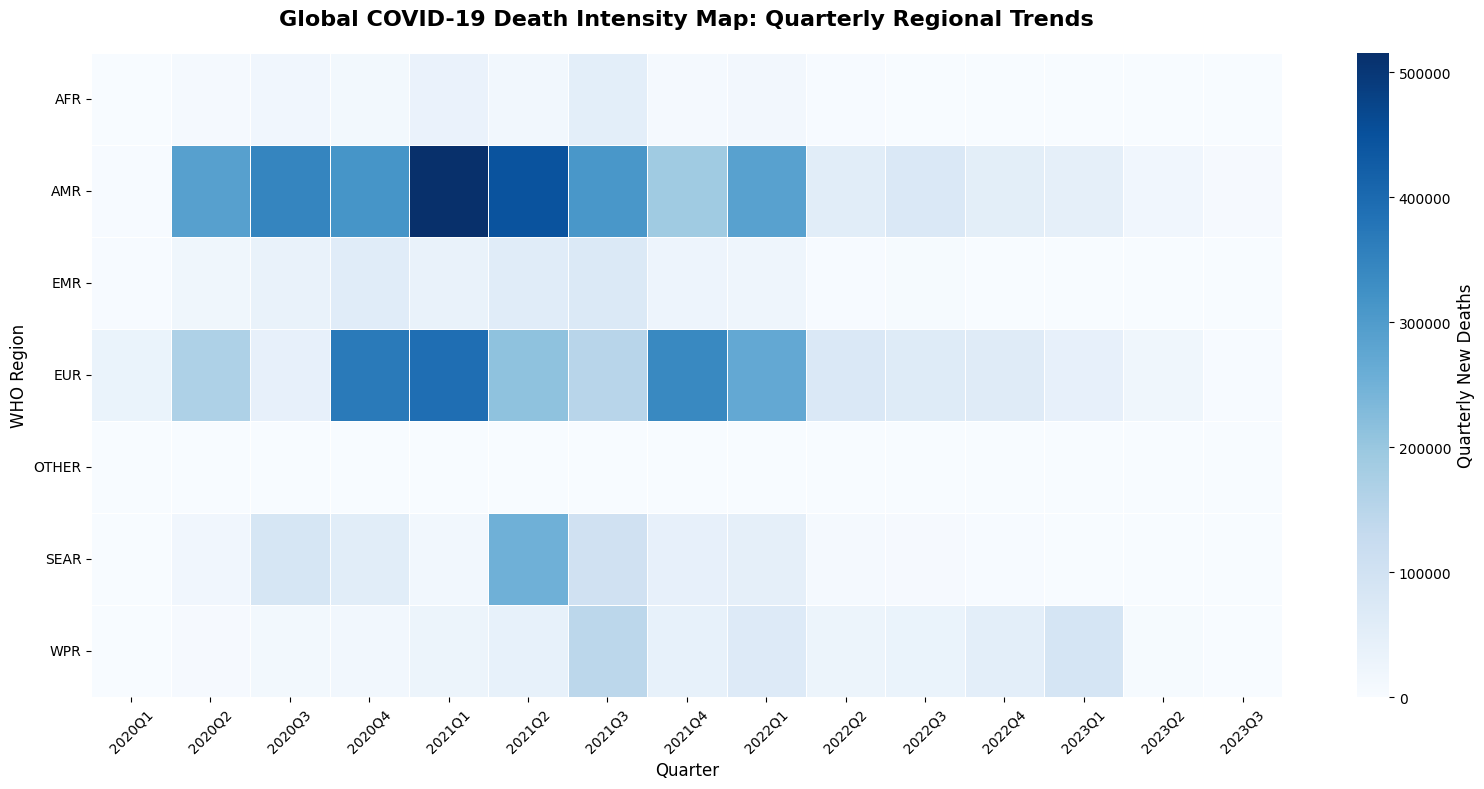

In [14]:
# Create quarterly data
df_quarterly = df_covid_trimmed.copy()
df_quarterly['Quarter'] = df_quarterly['Date_reported'].dt.to_period('Q')

# Aggregate by WHO region and quarter (new deaths)
heatmap_deaths = df_quarterly.groupby(['WHO_region', 'Quarter'])['New_deaths'].sum().reset_index()

# Pivot for heatmap
heatmap_pivot_deaths = heatmap_deaths.pivot(index='WHO_region', columns='Quarter', values='New_deaths')

# Fill missing with 0
heatmap_pivot_deaths = heatmap_pivot_deaths.fillna(0)

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(
    heatmap_pivot_deaths,
    cmap="Blues",   # different scheme for deaths
    cbar_kws={'label': 'Quarterly New Deaths'},
    linewidths=0.5,
    linecolor='white'
)

plt.title("Global COVID-19 Death Intensity Map: Quarterly Regional Trends",
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("WHO Region", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Customize colorbar
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()


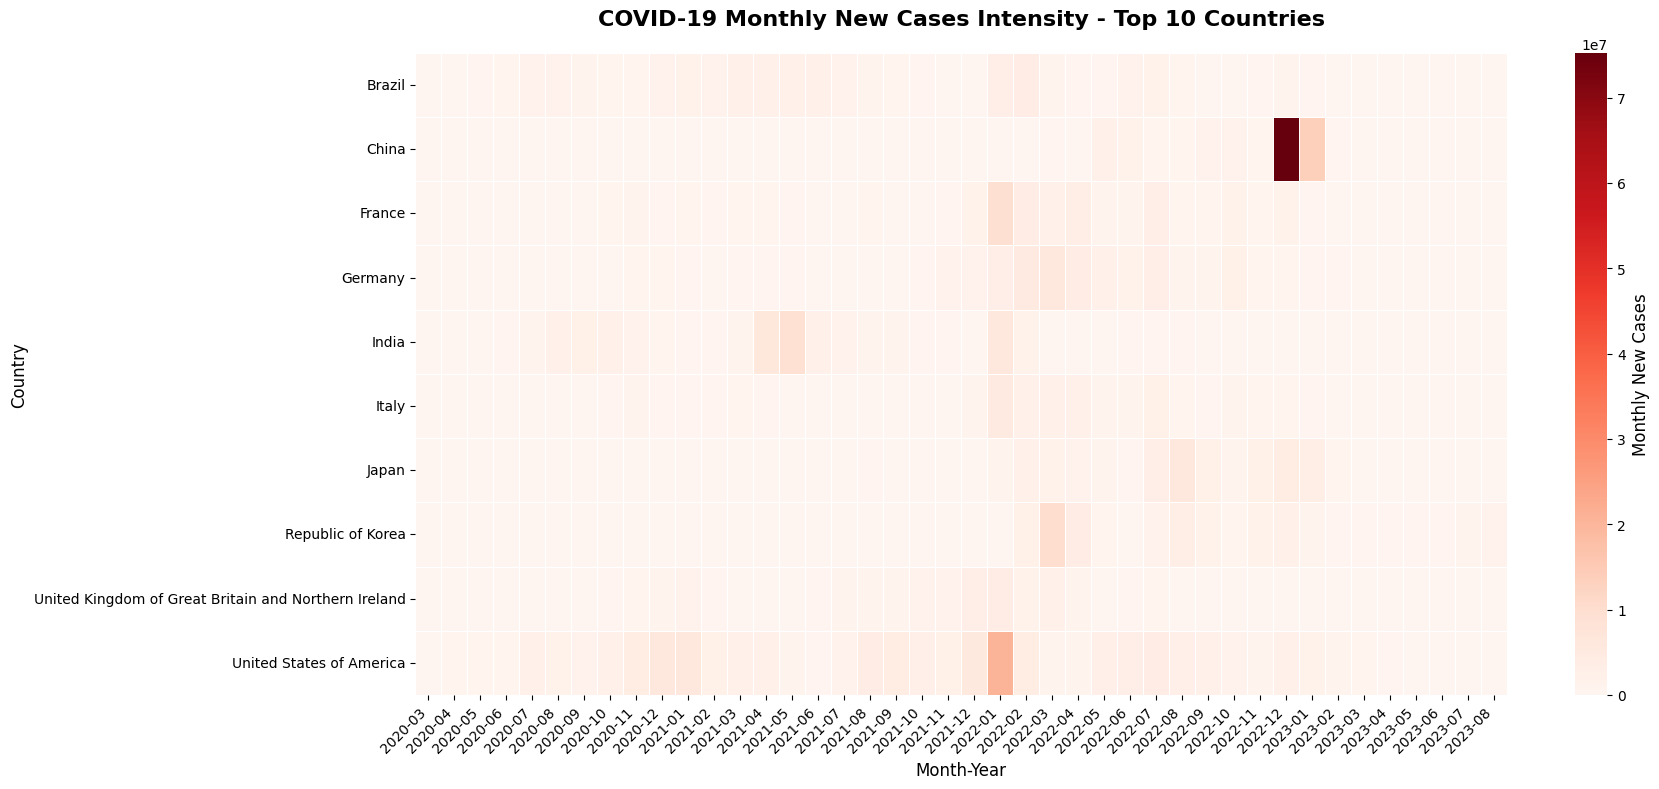

In [15]:
# Find top 10 countries by cumulative cases
top10_countries = (
    df_covid_trimmed.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter only top 10 countries
df_top10 = df_covid_trimmed[df_covid_trimmed["Country"].isin(top10_countries)].copy()

# Create month-year column
df_top10['Month_Year'] = df_top10['Date_reported'].dt.to_period('M')

# Aggregate monthly new cases by country
heatmap_cases = df_top10.groupby(['Country', 'Month_Year'])['New_cases'].sum().reset_index()

# Pivot for heatmap
heatmap_pivot_cases = heatmap_cases.pivot(index='Country', columns='Month_Year', values='New_cases')

# Fill missing with 0
heatmap_pivot_cases = heatmap_pivot_cases.fillna(0)

# Plot heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(
    heatmap_pivot_cases,
    cmap="Reds",  # intense red shades for cases
    cbar_kws={'label': 'Monthly New Cases'},
    linewidths=0.5,
    linecolor='white'
)

plt.title("COVID-19 Monthly New Cases Intensity - Top 10 Countries",
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust colorbar font size
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()




---



## Interactive COVID-19 Dashboard with Plotly

In this section, we build an interactive dashboard to explore the COVID-19 dataset using **Plotly**.  
The dashboard allows dynamic filtering, visualization, and comparison of different trends such as  
- **Daily New Cases and Deaths** across regions and countries  
- **Cumulative trends** over time  
- **Stacked bar charts** and **line plots** for deeper insights  

This interactive approach provides users with the flexibility to investigate the data from multiple perspectives,  
making the analysis more engaging and intuitive compared to static charts.


###  About Plotly

**Plotly** is a powerful, open-source Python library that allows us to create **interactive and publication-quality visualizations**—like line plots, bar charts, heatmaps, and more—right inside our notebooks. It enables users to **zoom, hover, and explore data dynamically**, making data storytelling both engaging and intuitive.


In [16]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



# ---- 1. Line Chart: Global New Cases Over Time ----
fig_cases = px.line(
    df_covid_trimmed.groupby('Date_reported', as_index=False).sum(),
    x="Date_reported",
    y="New_cases",
    title="Global New COVID-19 Cases Over Time"
)

# ---- 2. Line Chart: Global New Deaths Over Time ----
fig_deaths = px.line(
    df_covid_trimmed.groupby('Date_reported', as_index=False).sum(),
    x="Date_reported",
    y="New_deaths",
    title="Global New COVID-19 Deaths Over Time",
    color_discrete_sequence=["red"]
)

# ---- 3. Stacked Bar Chart: New Cases vs New Deaths grouped by WHO Region ----
region_grouped = df_covid_trimmed.groupby(['Date_reported', 'WHO_region'], as_index=False)[['New_cases', 'New_deaths']].sum()

fig_stacked = go.Figure()
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date_reported"],
    y=region_grouped["New_cases"],
    name="New Cases",
    marker_color="blue"
))
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date_reported"],
    y=region_grouped["New_deaths"],
    name="New Deaths",
    marker_color="red"
))

fig_stacked.update_layout(
    barmode="stack",
    title="New Cases vs New Deaths (Stacked) by WHO Region",
    xaxis_title="Date",
    yaxis_title="Count",
)

# ---- 4. Choropleth Map: Total Cases by Country ----
country_grouped = df_covid_trimmed.groupby('Country', as_index=False)['Cumulative_cases'].max()

fig_map = px.choropleth(
    country_grouped,
    locations="Country",
    locationmode="country names",
    color="Cumulative_cases",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Global Distribution of Total COVID-19 Cases"
)

# ---- Display all interactive charts ----
fig_cases.show()
fig_deaths.show()
fig_stacked.show()
fig_map.show()


## Question

Interpret the above map shown.

---



The choropleth map is showing the global distribution of cumulative COVID-19 cases by country.

Color intensity = Total cases

Countries are shaded based on the maximum cumulative cases recorded.

Darker shades (toward the higher end of the Viridis scale) indicate countries with the largest total case counts.

Lighter shades indicate fewer cases.

Global pattern

Large, densely populated countries like the United States, India, and Brazil are among the darkest regions, highlighting that they had the highest overall case counts.

Other countries with significant outbreaks, such as Russia, France, the UK, and Turkey, also appear in darker tones.

Smaller nations or those with effective containment appear in much lighter colors.

Geographic insights

The Americas, South Asia, and parts of Europe stand out as epicenters of high total cases.

Many African nations and small island countries show lighter shades, reflecting fewer recorded cumulative cases , though this may also relate to differences in testing and reporting capacity.

Interactive aspect- Hovering over a country reveals its exact cumulative case count, allowing comparisons beyond just visual color intensity.



---

#Assignment:

Find a similart dataset (e.g. `Ebola | 2014-2016 | Western Africa Ebola Outbreak` ) and extract a similar visualization out of it.





checkout:  `https://www.kaggle.com/datasets/imdevskp/ebola-outbreak-20142016-complete-dataset`